In [1]:
# import all the required librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
titanic = sns.load_dataset('titanic')

In [3]:
# print the first 10 rows of this dataset
titanic.head(10)

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [4]:
# we need to count the shape of this dataset: number of rows(= number of passengers) and number of columns
titanic.shape

(891, 15)

In [5]:
# I wanna get a feel of the dataset so im gonna call upon the describe function to get a summary statistics!
# lets view some basic statistical details like min max, mean, standard deviation, the percentile etc. 
titanic.describe()

survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

In [6]:

# the summary statistics is only for the numeric variables which makes sense
# so lets have statistics only for col age and fare cos those are the only   # numeric 
# variables that you can get summary statistics for 

titanic[['age', 'fare']].describe()

age        fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

In [7]:

# the count of age is not 891 means that age has got some missing values
# example max of age on the ship is 80
# min age is 4,2 month
# the average age is just above to 29 




In [8]:
# we have to look through the numbers of rows that have 
# the feature we are looking for 
# here we are looking to see how many passengers had survived

titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

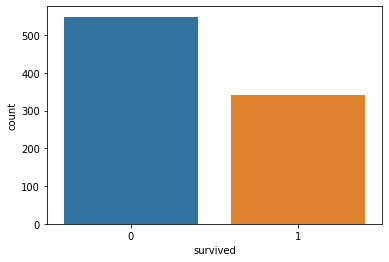

In [9]:
# we need to visualize the number of survivors 

sns.countplot(titanic['survived'])

In [10]:
# we have to look through the relation between the
# output which is 'survived' and the other input features  
# We are going to do it step by step


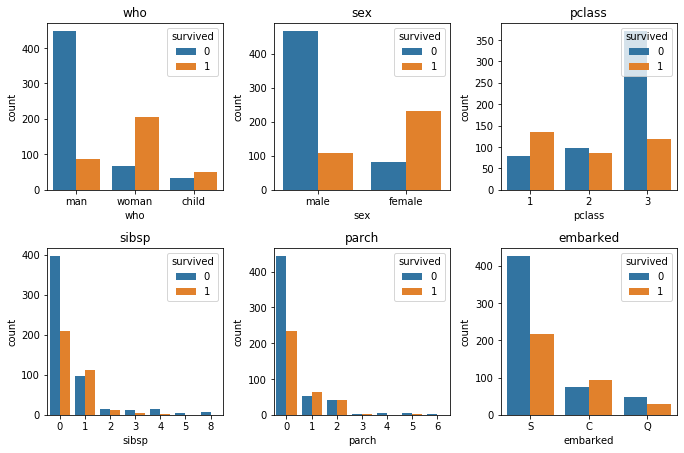

In [11]:
# lets visualize the count of survivors for the cols = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
# To do so Step 1 indicate the list of cols as well as the n_rows and cols 
# step 2 create two instances of subplotgrid and indicate the figuresize
# step 3 loop through the grid then inside create an i index to go through eaach cols then create a var to position each subplot

cols  = ['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows, n_cols = 2,3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.2, n_rows *3.2))

for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r *n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue = titanic['survived'], ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'survived', loc = 'upper right')
plt.tight_layout()

In [12]:
# look at survival rate by sex

titanic.groupby('sex')[['survived']].mean()


survived
sex             
female  0.742038
male    0.188908

In [13]:
titanic.groupby('embarked')[['survived']].mean()

survived
embarked          
C         0.553571
Q         0.389610
S         0.336957

In [14]:
# look at survival rate by sex and class

titanic.pivot_table('survived', index = 'sex', columns = 'class')

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

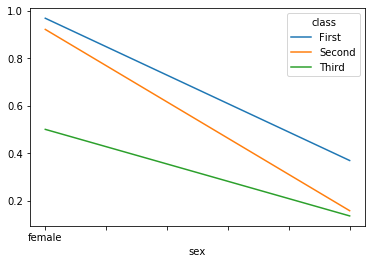

In [15]:
# look at survival rate by sex and class visually

titanic.pivot_table('survived', index = 'sex', columns = 'class').plot()

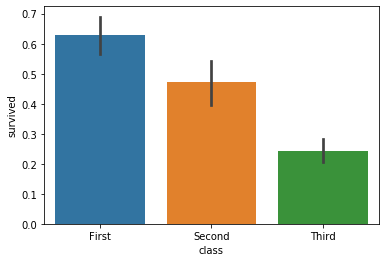

In [16]:
# plot the survival rate for each class

sns.barplot(x= 'class', y = 'survived', data = titanic)


In [17]:
# look at the survival rate by sex and class 
# we have to break up the age data

age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', index = ['sex', age], columns = 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

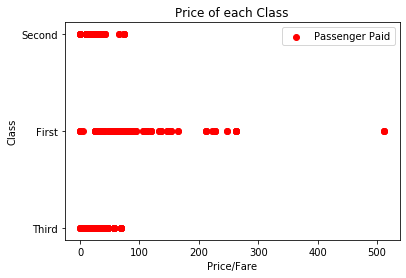

In [18]:
# Plot the prices paid of each class
# each dot is a passenger, x-axis is the fare and y-axis is the class

plt.scatter(titanic['fare'], titanic['class'], color = 'red', label = 'Passenger Paid')

plt.xlabel('Price/Fare')
plt.ylabel('Class')
plt.title('Price of each Class')
plt.legend()
plt.show()


In [19]:
# We have analysed the data visually very well, we have a good understanding of this dataset
# Now lets look for empty values in order to encoder the categorical values to be ready for processing

# count the empty values in each column

titanic.isna().sum()





survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [20]:
# we can see the age column is missing 177 value and embarked is missing 2, deck 688
# almost more than 70 percent of the data in the deck column is missing so lets get rid of the deck column
# then we are going to get rid of the missing rows for age, embarked and embarked town 

# look at all the values in each column and get a count 

for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [21]:
# we can see that the column alive is redundant 
# we have to remove it n keep the column survived
# pclass and class are also redundant
# lets drop all the redundant columns

# Drop the columns 

titanic = titanic.drop(['deck', 'embark_town', 'class', 'who', 'alone', 'adult_male', 'alive'], axis = 1)

In [22]:
# Now Lets remove the rows with missing values

titanic = titanic.dropna(subset = ['age', 'embarked'])



In [23]:
# Count the new number of rows and columns in the data set

titanic.shape


(712, 8)

In [24]:
# look at the data types in order to decide what column to encoder
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [25]:
# All the columns are number values except sex and embarked which have object date type
# We need to encoder them into integers using the method LabelEncoder from Sklearn.preprocessing 
# then for the selection of the dataset we are going to use iloc

# Before we encode the sex and embarked columns
# lets print their unique values

print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [26]:
# lets start by Encoding the sex columns 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)

In [27]:
# lets encode the embark column

titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)

In [28]:
# we need to print the new values of the sex column 
print(titanic['sex'].unique())
print(titanic['embarked'].unique())




[1 0]
[2 0 1]


In [29]:
# lets see again what datatypes we got after the encoder

titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [30]:
# lets print the 5 first rows of the dataset after modification 
titanic.head()

survived  pclass  sex   age  sibsp  parch     fare  embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

In [31]:
# Now lets split the data into independant "X" (input = feature) and dependant "Y" (Y = target = output=label)
# we are going to use this X dataset to train our model
# to come up with the Y variable to tell us if the passenger survived or did not
# what we are doing right here is the splitting off our data 

# we just specified the input X (input or features)and the output (output or label)Y

X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

In [32]:
# Creating a training set 
# Split the dataset into 80 % training and 20% testing 
# sklearn is a free machine learning library for python 
# It features various algorithms and supports numerical and scientific librairies like NumPy and SciPy


from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0 )

# we gave this method the datasets to split which are X and Y which we created just above here and then we are going to give it the testing size 20%


In [47]:
# Create a function with many ML models to see which model works better with what we have here

def models(X_train, Y_train):

    # Use Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)

    # Use Kneibors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)

    # USE SVC(LINEAR KERNEL)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, Y_train)

    # Use SVC (RBF Kernel)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)

    # Use GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    # Use DecisionTree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    # Use RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(criterion='entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    # Print the training accuracy (score) for each model

    print('Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('Kneighbors Classifier Training Accuracy:',knn.score(X_train, Y_train))
    print('SVC Linear Training Accuracy:',svc_lin.score(X_train, Y_train))
    print('SVC RBF Training Accuracy:',svc_rbf.score(X_train, Y_train))
    print('GaussianNB Training Accuracy:',gauss.score(X_train, Y_train))
    print('Decision Tree Classifier Training Accuracy:',tree.score(X_train, Y_train))
    print('RandomForestClassifier Training Accuracy:',forest.score(X_train, Y_train))

    return log, knn, svc_lin, svc_rbf, gauss, tree, forest





In [50]:
# the Accuracy of all the models on the train data
# The accuracy score for training data

model = models(X_train, Y_train)

Logistic Regression Training Accuracy: 0.8031634446397188
Kneighbors Classifier Training Accuracy: 0.789103690685413
SVC Linear Training Accuracy: 0.7768014059753954
SVC RBF Training Accuracy: 0.6854130052724078
GaussianNB Training Accuracy: 0.8031634446397188
Decision Tree Classifier Training Accuracy: 0.9929701230228472
RandomForestClassifier Training Accuracy: 0.9929701230228472


In [54]:
# The accuracy for all the models on the test data 
# The accuracy score for testing data
# We need to use the method confusion_matrix from the sklearn.metrics
# We need to use all the models for testing 

from sklearn.metrics import confusion_matrix

for i in range(len(model)):

    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    # Extract the TN, FP, FN, TP

    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

    test_score = (TP+TN)/(TP+TN+FN+FP)

    print(cm)

    print('Model[{}] Testing Accuracy = "{}"'.format(i, test_score))
    print()

[[74  8]
 [18 43]]
Model[0] Testing Accuracy = "0.8181818181818182"

[[64 18]
 [30 31]]
Model[1] Testing Accuracy = "0.6643356643356644"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy = "0.7902097902097902"

[[75  7]
 [45 16]]
Model[3] Testing Accuracy = "0.6363636363636364"

[[69 13]
 [23 38]]
Model[4] Testing Accuracy = "0.7482517482517482"

[[60 22]
 [10 51]]
Model[5] Testing Accuracy = "0.7762237762237763"

[[69 13]
 [16 45]]
Model[6] Testing Accuracy = "0.7972027972027972"



In [56]:
# Lets chose the best model which is the RandomForestClassifier
# Get the importance of the features using this model


forest = model[6]

importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns, 'importance': np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

importance
feature             
age            0.293
fare           0.283
sex            0.203
pclass         0.093
sibsp          0.053
parch          0.043
embarked       0.032

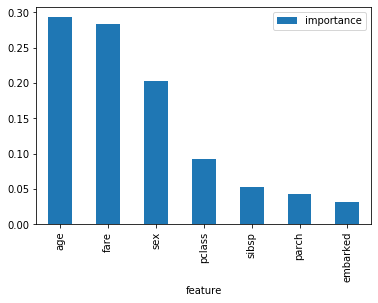

In [57]:
# Visualize the importance

importances.plot.bar()

In [58]:
# Print the prediction of the random forest classifier
# this is the result of a prediction

pred = model[6].predict(X_test)
print(pred)

[1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]


In [59]:
# Print the actual values
# this is the actual values 
# rhis is the result of real values that already exits


print(Y_test)

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [60]:
# So if we compare the predicted values and the real values 
# some match up and some don't 
# this is why our model is 

In [61]:
# my survival

my_survival = [[0,0,18,0,0,0,1]]

pred = model[6].predict(my_survival)

print(pred)

if pred == 0 : print('Oh! No You did not make it')
else: print('Bravo! You survived')

[1]
Bravo! You survived
